# Packages

In [3]:
import pandas as pd
import numpy as np


# Data Processing

### Bollywood Data

###  Song Data

In [2]:

bolly_df=pd.read_csv('Bollywood Data.txt')


In [3]:
bolly_df=bolly_df.head(50)
bolly_df.drop(bolly_df.columns[[0]],axis=1, inplace=True)
bolly_df.head()

,Song Title,Artist 1,Artist 2,Mood,Genre,Year,People Liked,Popularity
0,Tum Hi Ho,Arijit Singh,NaN,Romantic,Pop,2013,3500000,9500000.0
1,Chaiyya Chaiyya,Sukhwinder Singh,NaN,Energetic,Folk,1998,4000000,9000000.0
2,Kal Ho Naa Ho,Sonu Nigam,NaN,Sad,Pop,2003,2800000,8800000.0
3,Jai Ho,A. R. Rahman,NaN,Energetic,Fusion,2008,3200000,9200000.0
4,Tujh Mein Rab Dikhta Hai,Shreya Ghoshal,NaN,Romantic,Classical,2008,2500000,8700000.0


In [4]:
bolly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Song Title    50 non-null     object 
 1   Artist 1      50 non-null     object 
 2   Artist 2      21 non-null     object 
 3   Mood          50 non-null     object 
 4   Genre         50 non-null     object 
 5   Year          50 non-null     int64  
 6   People Liked  50 non-null     int64  
 7   Popularity    50 non-null     float64
dtypes: float64(1), int64(2), object(5)
memory usage: 3.3+ KB


# Inclusion of Rating

##  Popularity/People Liked 

In [5]:
bolly_df['Rating']=bolly_df['Popularity']/bolly_df['People Liked']


In [6]:
bolly_df.head()

,Song Title,Artist 1,Artist 2,Mood,Genre,Year,People Liked,Popularity,Rating
0,Tum Hi Ho,Arijit Singh,NaN,Romantic,Pop,2013,3500000,9500000.0,2.714286
1,Chaiyya Chaiyya,Sukhwinder Singh,NaN,Energetic,Folk,1998,4000000,9000000.0,2.250000
2,Kal Ho Naa Ho,Sonu Nigam,NaN,Sad,Pop,2003,2800000,8800000.0,3.142857
3,Jai Ho,A. R. Rahman,NaN,Energetic,Fusion,2008,3200000,9200000.0,2.875000
4,Tujh Mein Rab Dikhta Hai,Shreya Ghoshal,NaN,Romantic,Classical,2008,2500000,8700000.0,3.480000


# EDA

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [8]:
bolly_df.groupby('Song Title')['People Liked'].mean().sort_values(ascending=False).head()

Song Title
Pachtaoge             4200000.0
Chaiyya Chaiyya       4000000.0
Channa Mereya         4000000.0
Zingaat               3800000.0
Ae Dil Hai Mushkil    3800000.0
Name: People Liked, dtype: float64

In [9]:
rating=pd.DataFrame(bolly_df.groupby('Song Title')['Rating'].mean())
rating.head()

,Rating
Song Title,
Aaj Kal Tere Mere Pyar Ke,3.148148
Aankhon Mein Teri,3.269231
Ae Dil Hai Mushkil,2.447368
Afreen Afreen,2.647059
Agar Tum Saath Ho,2.647059


In [10]:
bolly_df.groupby('Song Title')['People Liked'].count().sort_values(ascending=False).head()

Song Title
Aaj Kal Tere Mere Pyar Ke      1
Sun Saathiya                   1
Pachtaoge                      1
Pal Pal Dil Ke Paas            1
Palat - Tera Hero Idhar Hai    1
Name: People Liked, dtype: int64

<Axes: >

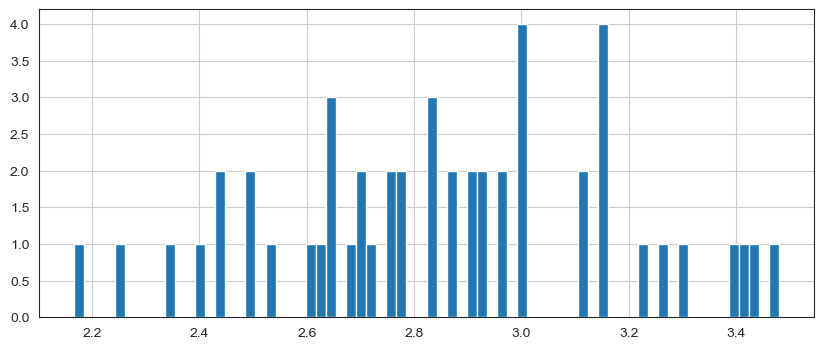

In [11]:
plt.figure(figsize=(10,4))
rating['Rating'].hist(bins=70)

# Emotion Detection


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
import neattext.functions as nfx

In [13]:
df=pd.read_csv('emotion_dataset.csv')

In [14]:

df.head()



,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [15]:
df.shape

(34792, 2)

In [16]:
df.dtypes

Emotion    object
Text       object
dtype: object

In [17]:
df.isnull()

,Emotion,Text
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
34787,False,False
34788,False,False
34789,False,False
34790,False,False


In [18]:
sorted_df = df.sort_values(by='Emotion')
    

In [19]:
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

In [24]:

for i in range(len(df['Emotion'])):
    if(df['Emotion'][i]=='shame'):
        df['Emotion'][i]='sadness'
    elif(df['Emotion'][i]=='fear'):
        df['Emotion'][i]='sadness'
    elif(df['Emotion'][i]=='disgust'):
        df['Emotion'][i]='sadness'
    elif(df['Emotion'][i]=='surprise'):
        df['Emotion'][i]='joy'

<Axes: >

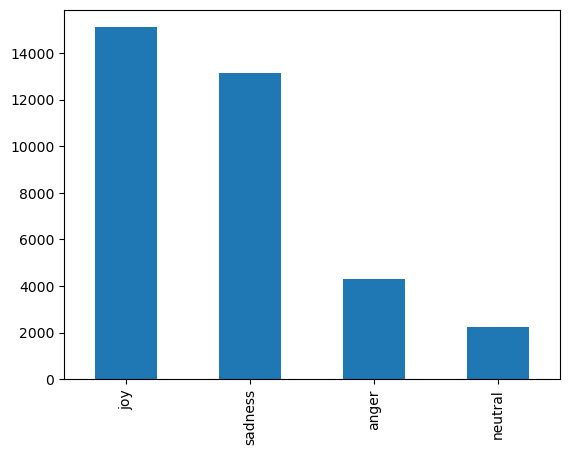

In [25]:

df['Emotion'].value_counts().plot(kind='bar')

<Axes: xlabel='Emotion', ylabel='count'>

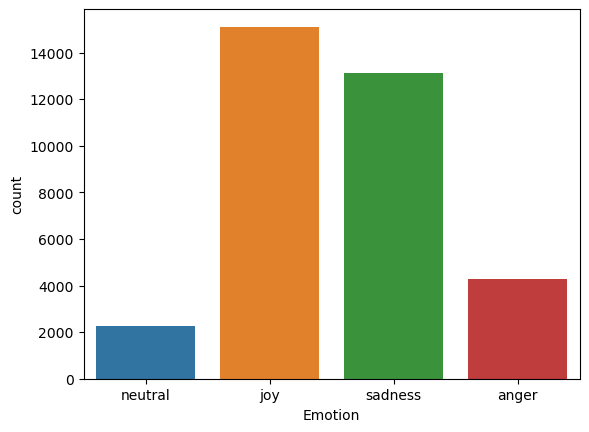

In [26]:
sns.countplot(x='Emotion',data=df)

##  Sentiment Analysis

In [27]:
from textblob import TextBlob

In [28]:
def getSentiment(text):
    blob=TextBlob(text)
    sentiment=blob.sentiment.polarity
    if sentiment > 0:
        result='Positive'
    elif sentiment < 0:
        result='Negative'
    else:
        result = 'Neutral'
    return result

In [29]:
getSentiment("i love coding")

'Positive'

In [30]:
df['Sentiment']=df['Text'].apply(getSentiment)

In [31]:
df.head()

,Emotion,Text,Sentiment
0,neutral,Why ?,Neutral
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative
3,joy,Such an eye ! The true hazel eye-and so brill...,Positive
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral


In [32]:
# Compare Emotion vs Sentiment

In [33]:
df.groupby(['Emotion','Sentiment']).size()


Emotion  Sentiment
anger    Negative     1787
         Neutral      1386
         Positive     1124
joy      Negative     2305
         Neutral      5193
         Positive     7609
neutral  Negative      178
         Neutral      1523
         Positive      553
sadness  Negative     4535
         Neutral      4269
         Positive     4330
dtype: int64

<Axes: xlabel='Emotion,Sentiment'>

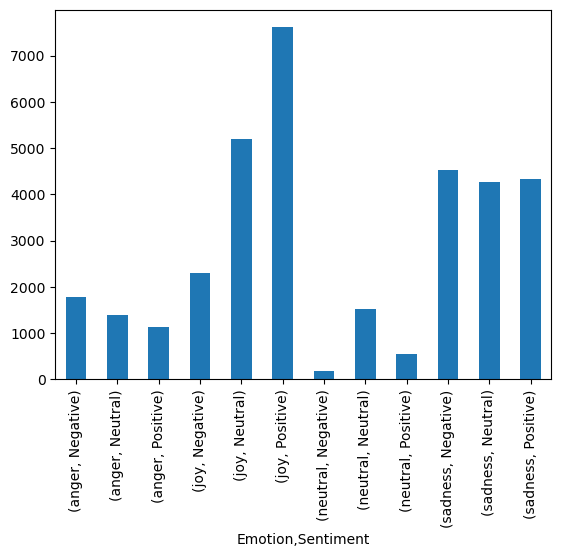

In [34]:
df.groupby(['Emotion','Sentiment']).size().plot(kind='bar')

C:\Users\sreev\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


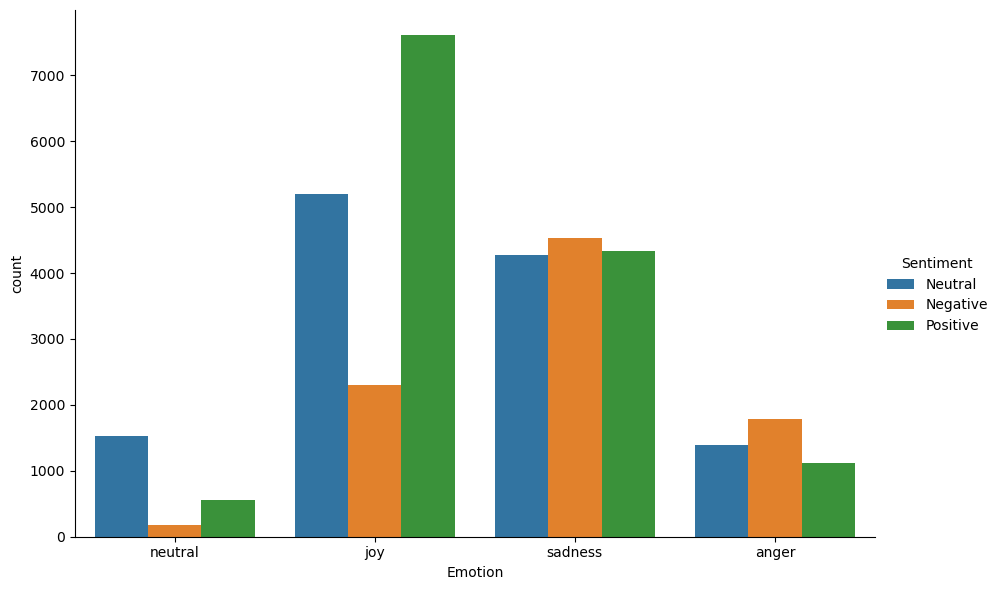

In [35]:
sns.catplot(x='Emotion',hue='Sentiment',data=df,kind='count',height=6,aspect=1.5)


In [36]:
df['Clean_text']=df['Text'].apply(nfx.remove_stopwords)
df['Clean_text']=df['Clean_text'].apply(nfx.remove_punctuations)
df['Clean_text']=df['Clean_text'].apply(nfx.remove_userhandles)


In [37]:
df[['Text','Clean_text']]

,Text,Clean_text
0,Why ?,
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,A man robbed me today .,man robbed today
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


In [38]:
df['Clean_text']

0                                                         
1                           Sage Act upgrade list tommorow
2        WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3        eye  true hazel eyeand brilliant  Regular feat...
4          ugh babe hugggzzz u  babe naamazed nga ako e...
                               ...                        
34787           gift Hope like it hand wear  Itll warm Lol
34788           world didnt meso world DEFINITELY cnt away
34789                                    man robbed today 
34790                            Youu JEALOUSY #Losing YOU
34791                                think baby dream time
Name: Clean_text, Length: 34792, dtype: object

In [39]:
df['Emotion']

0        neutral
1            joy
2        sadness
3            joy
4            joy
          ...   
34787        joy
34788        joy
34789      anger
34790    sadness
34791    sadness
Name: Emotion, Length: 34792, dtype: object

In [40]:
from collections import Counter

In [41]:
def extract_keywords(text,num=50):
    tokens=[tok for tok in text.split()]
    most_common_tokens=Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [42]:
Emotion_list=df['Emotion'].unique().tolist()

In [43]:
Emotion_list

['neutral', 'joy', 'sadness', 'anger']

In [44]:
joy_list=df[df['Emotion']=='joy']['Clean_text']

In [45]:
joy_docx=' '.join(joy_list)
joy_docx

'Sage Act upgrade list tommorow eye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness    ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko ang maken Tip 2: Stop op een moment dat je het hele project wel ziet zitten Nu dus #derestkomtlaterwel En dan krijg je ff een cadeautje van een tweep #melike   Drummer Boy bij op verzoek van      : welke uitvoering van wie life  Leopold truly happy : hopes prayers beloved son come fruition  Haha course come home different house leave parents redo entire downstairs warning feeling fail french #fuckfrench GoodLet     reeeeeellllyyyyyyy need tell something guess what phone fucked up #gotohellmexicanphone fell love \\X\\ Overnight felt confidence selfesteem responsible worthwhile ending pooped pants end we

In [46]:
keyword_joy= extract_keywords(joy_docx)
keyword_joy

{'day': 872,
 'amp': 802,
 'Im': 782,
 'time': 722,
 'today': 621,
 'like': 593,
 'work': 577,
 'tomorrow': 572,
 'Christmas': 537,
 'love': 519,
 ':)': 512,
 'home': 462,
 'got': 454,
 'good': 446,
 'night': 425,
 'going': 420,
 'happy': 418,
 'en': 386,
 'de': 370,
 'school': 366,
 'morning': 345,
 'know': 342,
 '2': 331,
 'een': 325,
 'week': 292,
 'year': 283,
 'RT': 283,
 'life': 277,
 'hours': 277,
 'tonight': 271,
 'people': 269,
 'joy': 261,
 'new': 253,
 'feel': 252,
 'great': 250,
 'me': 248,
 'days': 241,
 'friends': 234,
 'it': 230,
 'think': 228,
 'cant': 223,
 'long': 222,
 'family': 219,
 's': 216,
 'sleep': 213,
 'u': 212,
 'wait': 207,
 'met': 202,
 'best': 196,
 'friend': 194}

In [47]:
def plot_most_common_words(mydict,emotion_name):
    df_01= pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(20,10))
    sns.barplot(x='token',y='count',data=df_01)
    plt.title('Plot of {} Most Common Words'.format(emotion_name))
    plt.xticks(rotation=45)
    plt.show()

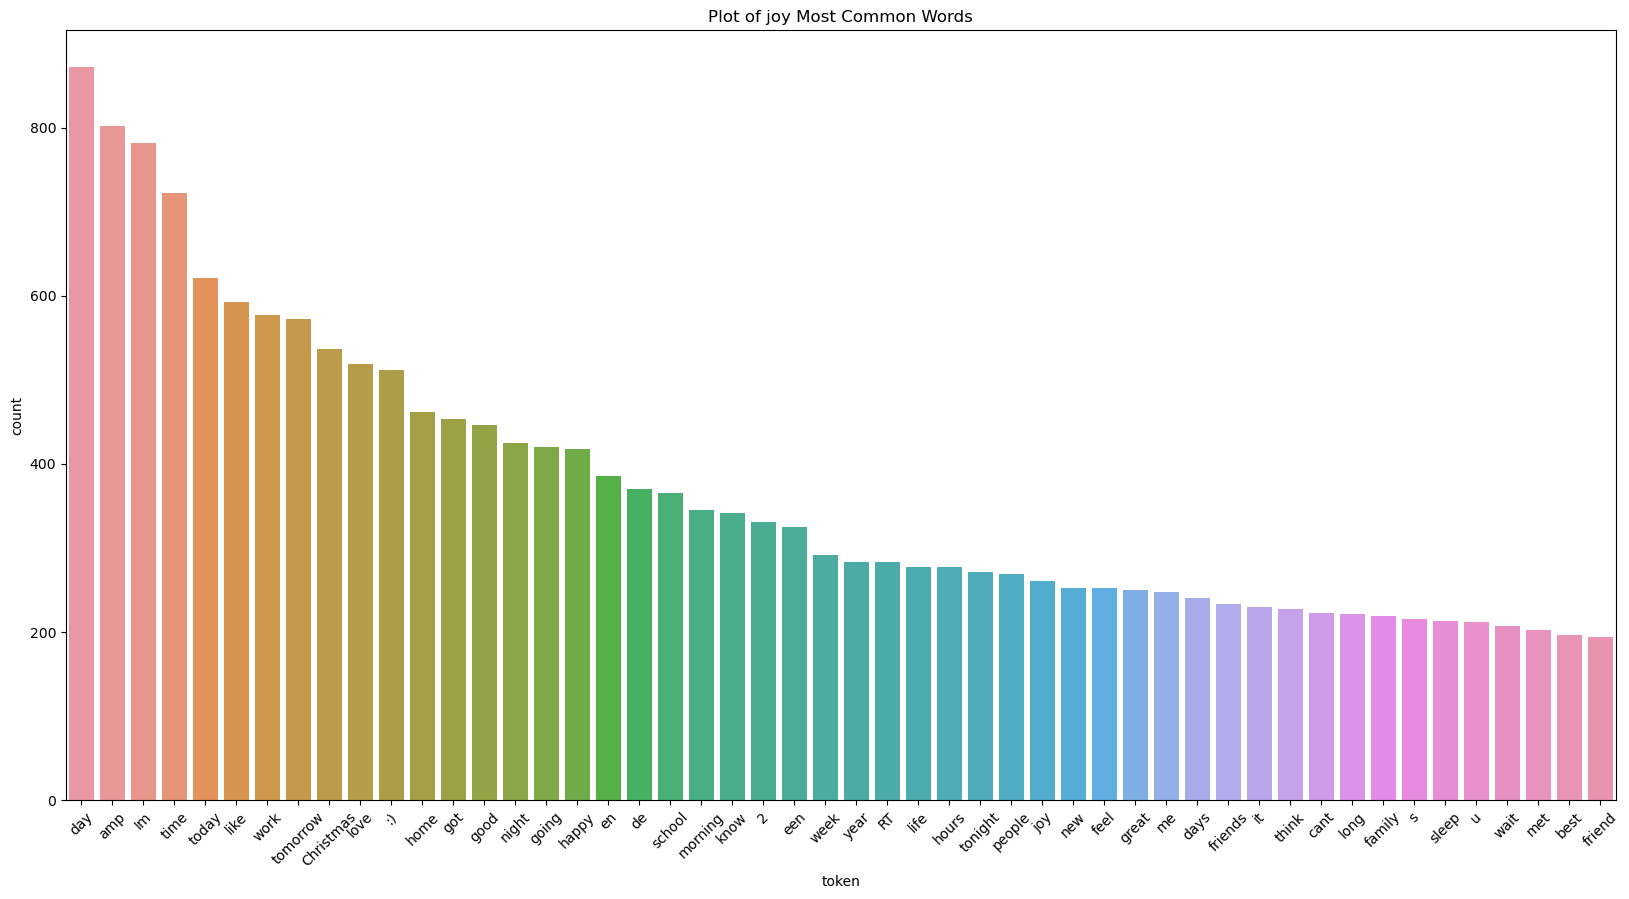

In [48]:
plot_most_common_words(keyword_joy,'joy')

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from sklearn.metrics import accuracy_score,confusion_matrix,confusion_matrix

from sklearn.model_selection import train_test_split

In [52]:
Xfeatures=df['Clean_text']
ylabel=df['Emotion']

In [53]:
Xfeatures = Xfeatures.dropna()
Xfeatures

0                                                         
1                           Sage Act upgrade list tommorow
2        WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3        eye  true hazel eyeand brilliant  Regular feat...
4          ugh babe hugggzzz u  babe naamazed nga ako e...
                               ...                        
34787           gift Hope like it hand wear  Itll warm Lol
34788           world didnt meso world DEFINITELY cnt away
34789                                    man robbed today 
34790                            Youu JEALOUSY #Losing YOU
34791                                think baby dream time
Name: Clean_text, Length: 34792, dtype: object

In [54]:
cv=CountVectorizer()
X=cv.fit_transform(Xfeatures)

In [55]:
cv.get_feature_names_out()

array(['00', '000', '000ème', ..., 'ღƪ', 'ℕoíʀ', 'ㄒʜℰℳℰ'], dtype=object)

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,ylabel,test_size=0.3,random_state=42)

In [57]:
nv_model=MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB()

In [58]:
nv_model.score(X_test,y_test)

0.672351025100594

In [59]:
y_pred_for_nv=nv_model.predict(X_test)

In [60]:
y_pred_for_nv

array(['sadness', 'sadness', 'sadness', ..., 'sadness', 'sadness',
       'sadness'], dtype='<U7')

In [69]:
sample=["Riding is boring because all my friends cannot travel together "]

In [70]:
vect=cv.transform(sample).toarray()

In [71]:
nv_model.predict(vect)

array(['joy'], dtype='<U7')

In [72]:
nv_model.predict_proba(vect)

array([[6.62430498e-03, 6.36533538e-01, 5.46789908e-06, 3.56836689e-01]])

In [73]:
nv_model.classes_

array(['anger', 'joy', 'neutral', 'sadness'], dtype='<U7')

In [74]:
np.max(nv_model.predict_proba(vect))

0.6365335376472312

In [143]:
def predict_emotion(text,model):
    my_vect=cv.transform(text).toarray()
    prediction=model.predict(my_vect)
    pred_proba=model.predict_proba(my_vect)
    pred_percentage_for_all=dict(zip(model.classes_,pred_proba[0]))
    print('prediction:{}, prediction Score{}'.format(prediction[0],np.max(pred_proba)))
    display_song(prediction[0])
    return pred_percentage_for_all

In [144]:
predict_emotion(sample,nv_model)

prediction:joy, prediction Score0.6365335376472312
['Why This Kolaveri Di', 'Otha Sollaala', 'Kalyana Vayasu', 'Selfie Pulla', 'Oru Naal Koothu', 'Mental Manadhil', 'Kutti Story', 'Kadhalan', 'Maduraikku Pogathadi']


{'anger': 0.006624304976070104,
 'joy': 0.6365335376472312,
 'neutral': 5.467899084837612e-06,
 'sadness': 0.3568366894776198}

In [145]:
import random
import re
from collections import defaultdict
from textblob import TextBlob
from rake_nltk import Rake

class InteractiveConversationalBot:
    def __init__(self):
        self.memory = defaultdict(list)  # To remember conversation context
        self.user_name = None
        self.default_responses = [
            "Could you tell me more about that?",
            "That sounds interesting! What else?",
            "And then what happened?",
            "Do you often think about this?",
            "How does that make you feel?"
        ]
        self.engagement_questions = [
            "What do you think about this?",
            "How does this make you feel?",
            "Can you share more details?",
            "What are your thoughts on this?"
        ]
    
    def extract_keywords(self, text):
        # Basic keyword extraction: remove stopwords and simple text processing
        text = re.sub(r'[^\w\s]', '', text.lower())  # Remove punctuation and lower the case
        # Initialize RAKE
        rake = Rake()


        # Extract keywords
        rake.extract_keywords_from_text(text)
        keywords = rake.get_ranked_phrases()
        return keywords
    
    def generate_followup_question(self, keyword):
        # Simple dynamic question generation based on keywords
        questions = [
            
            f"What do you think about {keyword}?",
            f"How do you feel about {keyword}?",
            f"Can you elaborate more on {keyword}?",
            f"Do you often deal with {keyword}?"
        ]
        return random.choice(questions)
    
    def analyze_sentiment(self, text):
        # Analyze the sentiment of the user input using TextBlob
        blob = TextBlob(text)
        return blob.sentiment.polarity
    
    def personalize_response(self, text):
        # Adjust responses based on sentiment
        sentiment = self.analyze_sentiment(text)
        if sentiment > 0.5:
            return "I'm glad to hear that!"
        elif sentiment < -0.5:
            return "I'm sorry to hear that. Do you want to talk more about it?"
        else:
            return random.choice(self.engagement_questions)
    
    def get_response(self, user_input):
        if not self.user_name:
            self.user_name = user_input  # Capture the user's name
            return f"Nice to meet you, {self.user_name}! What would you like to talk about today?"
        
        keywords = self.extract_keywords(user_input)
        
        if keywords:
            keyword = random.choice(keywords)
            self.memory[keyword].append(user_input)
            followup = self.generate_followup_question(keyword)
            return f"{self.personalize_response(user_input)} {followup}"
        
        return random.choice(self.default_responses)

    def chat(self):
        print("Bot: Hi there! What's your name?")
        while True:
            user_input = input("User: ")
            if user_input.lower() in ["quit", "exit", "bye"]:
                print(f"Bot: Goodbye, {self.user_name}! Have a great day!")
                break
            response = self.get_response(user_input)
            
            print(f"Bot: {response}")
            predict_emotion([user_input],nv_model)

# Start the conversational bot
bot = InteractiveConversationalBot()
bot.chat()


Bot: Hi there! What's your name?
User: Sree
Bot: Nice to meet you, Sree! What would you like to talk about today?
prediction:joy, prediction Score0.4358626919602528
['Why This Kolaveri Di', 'Otha Sollaala', 'Kalyana Vayasu', 'Selfie Pulla', 'Oru Naal Koothu', 'Mental Manadhil', 'Kutti Story', 'Kadhalan', 'Maduraikku Pogathadi']


KeyboardInterrupt: Interrupted by user

In [78]:
songs_df=pd.read_csv('Content_Based_Filtering_T.csv')

In [79]:
songs_df['Mood']

0       Energetic
1       Energetic
2           Chill
3             Fun
4       Patriotic
5        Romantic
6            Mass
7        Romantic
8       Energetic
9        Romantic
10            Fun
11      Energetic
12    Melancholic
13       Romantic
14       Romantic
15            Fun
16           Mass
17      Energetic
18            Fun
19       Romantic
20      Energetic
21            Fun
22       Romantic
23            Fun
24            Fun
25       Romantic
26    Melancholic
27       Romantic
28       Romantic
29            Fun
30           Mass
31    Melancholic
32       Romantic
33       Romantic
34       Romantic
35            Fun
Name: Mood, dtype: object

In [80]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Song ID     36 non-null     int64 
 1   Song Title  36 non-null     object
 2   Movie Name  36 non-null     object
 3   Year        36 non-null     int64 
 4   Artists     36 non-null     object
 5   Overview    36 non-null     object
 6   Mood        36 non-null     object
 7   Genre       36 non-null     object
 8   Crew        36 non-null     object
dtypes: int64(2), object(7)
memory usage: 2.7+ KB


In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [82]:
tfv=TfidfVectorizer(min_df=3,max_features=None,strip_accents='unicode',
                   analyzer='word',token_pattern=r'\w{1,}',ngram_range=(1,3),
                   stop_words='english')
songs_df['Overview']=songs_df['Overview'].fillna('')

In [83]:
art=TfidfVectorizer(min_df=3,max_features=None,strip_accents='unicode',
                   analyzer='word',token_pattern=r'\w{1,}',ngram_range=(1,3),
                   stop_words='english')
songs_df['Artists']=songs_df['Artists'].fillna('')

In [84]:
tfv_matrix=tfv.fit_transform(df['Overview'])
art_matrix=art.fit_transform(df['Artists'])

KeyError: 'Overview'

In [ ]:
tfv_matrix

In [ ]:
tfv_matrix.shape

In [ ]:
art_matrix

In [ ]:
art_matrix.shape

In [ ]:
from sklearn.metrics.pairwise import sigmoid_kernel

sig=sigmoid_kernel(tfv_matrix,tfv_matrix)
siga=sigmoid_kernel(art_matrix,art_matrix)

In [ ]:
indices=pd.Series(df.index,index=df['Song Title']).drop_duplicates()

In [ ]:
indices

In [ ]:
def give_rec(title,sig=sig):
    idx=indices[title]
    
    sig_scores=list(enumerate(sig[idx]))
    
    siga_scores=list(enumerate(siga[idx]))
    
    siga_scores=sorted(siga_scores,key=lambda x:x[1],reverse=True)
    
    sig_scores=sorted(sig_scores,key=lambda x:x[1],reverse=True)
    
    new_scores=sig_scores+siga_scores
    
    new_scores=new_scores[1:11]
    
    movies_indices=[i[0] for i in new_scores]
    
    return df['Song Title'].iloc[movies_indices]

In [ ]:
give_rec('Vaathi Coming')

## Collaborative Filtering

In [ ]:
user=pd.read_csv('Collabrative Filtering T.csv')

In [ ]:
user

In [85]:
user_rating=user['Mukkala Mukkabala']
user_rating.head()

NameError: name 'user' is not defined

In [86]:
similar=user.corrwith(user_rating)


NameError: name 'user' is not defined

In [87]:
corr=pd.DataFrame(similar,columns=['Correlation'])
corr.dropna(inplace=True)
sorted_corr=corr.sort_values(by=['Correlation'],ascending=False)
sorted_corr

NameError: name 'similar' is not defined

## Recommendation function

In [137]:
def display_song(emotion):
    if(emotion=='joy'):
        
        print(funsong)
        
    elif(emotion=='sadness'):
        print(fun)
        
    elif(emotion=='anger'):
        print(fun)
        
    elif(emotion=='neutral'):
        print(songs_df['Fun'])
        print(songs_df['Energitic'])
    else:
        print(songs_df['Fun'])
        print(songs_df['Energitic'])

In [140]:

funsong=[]

for i in range(len(songs_df['Mood'])):
    if(songs_df['Mood'][i]=='Fun'):
        funsong.append(songs_df['Song Title'][i])
        

In [142]:

Enersong=[]

for i in range(len(songs_df['Mood'])):
    if(songs_df['Mood'][i]=='Energetic'):
        Enersong.append(songs_df['Song Title'][i])



In [141]:
funsong

['Why This Kolaveri Di',
 'Otha Sollaala',
 'Kalyana Vayasu',
 'Selfie Pulla',
 'Oru Naal Koothu',
 'Mental Manadhil',
 'Kutti Story',
 'Kadhalan',
 'Maduraikku Pogathadi']